$\newcommand{\rads}{~rad.s$^{-1}$}$
$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\textsf{e}^{#1}}$
$\newcommand{\glm}[1]{\overline{#1}^L}$
$\newcommand{\psmom}[0]{\boldsymbol{\textsf{p}}}$
$\newcommand{\di}[0]{\textrm{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\textrm{D} {#1}}{\textrm{D} t}}$
$\newcommand{\mdel}[1]{\textrm{D}_t {#1}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\mathrm i}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$

In [10]:
from IPython.display import Image, display, YouTubeVideo
from numpy import cos, sin, sqrt, linspace, pi, angle
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(False)

*[Book: chapter 1]*

This first chapter should be brief, a reminder of things you have seen before (and if not, well, it's not that hard).
I will mostly forcus on a mass, oscillating because attached to a spring.
Although very simple, this system encapsulates many features that we will see throughout the class.
In particular, a second derivative will appear, and second derivatives are all that this half-term is about.

All framed equations should be memorized.

# Expectations

I will have one of these sections at the beginning of each chapter.
They encapsulate what I hope to convey, and are usually divided into three sub-sections/imperatives: "Remember" (the stuff I ask you to remember), "Understand" (no need to memorize any of it, but you should be able to mentally represent it to yourself easily), "Create and apply" (what types of exercises you should be able to solve).

So, for this chapter:

## Remember

* Hooke's law.
* The simple harmonic oscillator (SHO) equation, $\ddot x + \omega^2 x = 0$.
* For the mass-spring system, what each symbol above represents (acceleration, angular frequency, position, respectively).
* For the mass-spring system, $\omega^2 = k/m$.
* How $\omega$ (the angular frequency), $\nu$ (the frequency) and $T$ (the oscillation period) are related, and the units of each.
* Solutions to the SHO are in the form of $A\sin(\omega t + \phi)$, $A\cos(\omega t + \phi)$, $A_1\sin(\omega t) + A_2\cos(\omega t)$ or any linear combination of these.
* That the three general solution forms above are equivalent, and can be turned into one another.
* That the energy is proportional to the square of the amplitude.
* That energies oscillate at twice the frequency of that of the position and velocity.

## Understand

* What the linear regime means.
* That an SHO is the combination of an inertial process (e.g., mass inertia, magnetic induction...) and of a restoring process (e.g., spring stiffness, capacitance...)
* How the SHO equation is assembled for the mass-spring system, and for the LC circuit.
* How the general solution forms above are mathematical representations of the motion (or charge, etc.) or the physical system.
* What the $A$'s and $\phi$ above represent physically.
* Similarities in Physics: if two ODEs have the same form, the mathematical solutions will also look the same.

## Create and apply

* Turn one general solution form above into another, with the help of a trigonometric identity cheat sheet.
* Do quick unit checks as a safeguard against algebra errors.
* From a set of two initial conditions (e.g. initial position **and** initial velocity, for the mass-spring system), how to compute the complete evolution of the system.
* How to apply knowledge from one type of oscillator (e.g., mass+spring) to obtain the solutions of a difference kind of oscillator (e.g., LC electric circuit).
* How to solve all problems in the problem sets and textbook.

# Let's Warm Up

During the lectures, I will try to stick to the physics: how to set parameters, how to model an equation mathematically, etc.
This physics often relies on mathematical background that I will not develop.
It is especially annoying that you are taking your first ODE class at the same time as PHY293: I did not create the rules, but I have to work with them.
In order to hopefully patch this temporary hole, I recorded the short video below (Jupyter) and at https://youtu.be/SlTA2EOtJks.
I strongly recommend that you watch it before the lecture.

*Note: I make a few mistakes here and there, not finishing a word, forgetting a subscript, not finishing a sentence... I highlighted the mistakes I caught in the document "PHY293, sin() and cos().pdf" on Quercus (see C01 module). I trust that you will be able to catch and correct the others.*

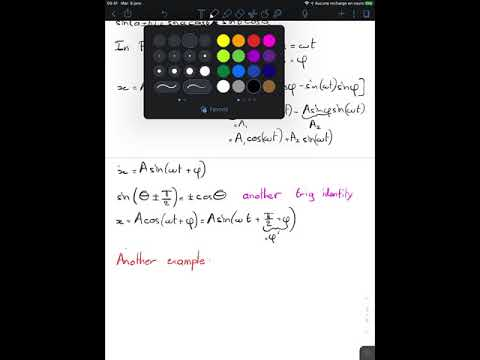

In [28]:
YouTubeVideo('SlTA2EOtJks', width=800, height=300)

Before I introduce the main oscillator of this chapter and the two after that (i.e., the mass+spring system), let me introduce you to another oscillator we will use often: the pendulum.
See below (Jupyer) or at https://youtu.be/QPpatmnS3bs.

*Note: the pdf export of the Jupyter notebook places a snapshot of the video on the document, giving it a slightly cult-of-personality-ish feel. Enjoy.*

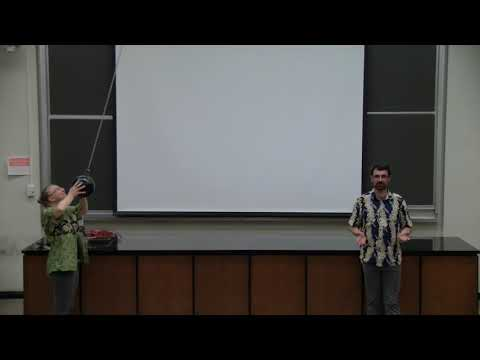

In [27]:
YouTubeVideo('QPpatmnS3bs', width=800, height=300)

# Equations of motion

Consider the spring-mass system in fig. 1. An ideal spring (that is, a weightless, dissipationless spring) of stiffess $k > 0$ [in N.m$^{-1}$, or kg.s$^{-2}$], attached to a fixed wall on one end, and an objet of mass $m$ [kg] on the other.

![Fig. 1: Basic spring-mass system, with $k$ the stiffness of the spring and $m$ the mass of the object.](SpringMass.png)

Let $x$ be the position of the centre of mass of the object. $x=0$ at rest, $x\neq 0$ otherwise.
Let's also assume the mass can slide on the surface without friction, and that the spring is "perfect" (that is, weightless and can oscillate without dissipation).

An equivalent system is the one I am presenting below (Jupyter notebook) and at https://youtu.be/cMjn04ivOfE.

*Other note: the body mic I was wearing only recorded the left audio channel. If you are listening with headphones, your headphones are fine.*

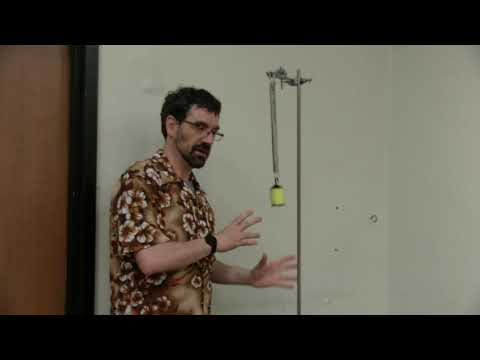

In [26]:
from IPython.display import YouTubeVideo

YouTubeVideo('cMjn04ivOfE', width=800, height=300)

We now pull the mass to position $x = x_0 \neq 0$ and hold it there.
If $x_0$ is "not too big", the spring will not deform or break.
In this case, the force of the spring on the mass is (Hooke's law)
$$ \Large \boxed{F = -kx_0.} $$

* The negative sign mean that the force is a **restoring force** (tends to bring back to origin).

* $k$ being constant, the force is proportional to the distance from rest state.

For a Flash animation of Hooke's law, follow this link:

https://faraday.physics.utoronto.ca/GeneralInterest/Harrison/Flash/ClassMechanics/HookesLaw/HookesLaw.html

Also look at the video of my face playing with a mass hanging from a string, on Quercus.

This behaviour could define what "linear" means in physics.
Any system for which a state of rest can be defined will respond linearly ("proportionnally") to weak disturbances or forces.

![Fig. 2: Illustration of what linear behavious means.](Linear.png)

**PHY293A: 100% linear physics.**

*Note that fig. 2 is incorrect for the spring: is a spring is compressed to the max, it simply stops compressing. For $x$ too far in the negative, the non-linear regime is a vertical line representing an infinite force for too much compression. Also, the sign is wrong.*

Let us now release our spring.
The motion of the object has to obey Newton's second law, which constitutes an equation of motion.
$$ ma = F\ \Rightarrow\ m\ddot{x} = -kx, $$
with $a = \ddot{x}$ the acceleration.
The equation above is a **second-order Ordinary Differential Equation (ODE)**.

**PHY293A: 99% 2**$^{nd}$**-order derivatives.**

*Note: in this class, a dot on top of a quantity denotes its time derivative, and time derivative only:*
$$ \dot{x} = \ode{x}t = v, \ \textrm{and}\ \ddot x = \oden{2}{x}{t} = a $$
*It cannot denote, e.g., a spatial derivative, and e.g. $\dot k$ makes no sense because it is a constant.*

# Solutions

Let $$\boxed{ \large \omega^2 = \frac{k}{m} \ \Rightarrow \ \ddot{x} + \omega^2 x = 0.} $$

$\omega$ is called the *angular frequency*.
Because $k$ is in kg.s$^{-2}$ and $m$ is in kg, $\omega$ is in s$^{-1}$ in SI units.
In many cases, people prefer to refer to the *frequency* (just frequency), as a measure of how many cycles per seconds there are.
Frequency $\nu$ and angular frequency $\omega$ are related via $\omega = 2\pi \nu$.
Because one full cycle corresponds to $2\pi$ radians, many people prefer to refer to the units of $\omega$ as rad.s$^{-1}$, and those of frequency as cycles.s$^{-1}$, or Hz.
It makes it less confusing but not SI compliant (both cycles and radians have SI units of 1). 
In the context of this class, you are expected to quote angular frequencies in rad.s$^{-1}$ and frequencies in Hz, and know which one is which. 

The solution of the framed equation above is $$ x = A\cos(\omega t + \phi), $$
with $A$ the *amplitude* of the oscillation and $\phi$ a *phase*, both to be determined.

Note that because $\cos(a+b) = \cos{a}\cos{b} - \sin{a}\sin{b}$, the solution can also be written $x = A_1\cos(\omega t) + A_2\sin(\omega t)$ (see my earlier video), with $A_1$ and $A_2$ now to be determined.
My derivation could be done in these terms, but I will stick to the first form of the solution.

We want to determine two parameters, $A$ and $\phi$. 
Therefore, we need two pieces of information.
We always have two *initial conditions*.
For example, we can start with a "clamped-mass" kind of initial condition: 

1. initially (at $t=0$), the position was $x(t=0) = x_0$ and

2. we are holding the mass still ($v(t=0)=0$). 

The velocity is $$ v = \dot x = -A\omega\sin(\omega t + \phi). $$ Therefore, at $t=0$,
    $$ x(t=0) = x_0 = A\cos(\phi)\quad \textrm{and}\quad v(t=0) = 0 = -A\omega\sin(\phi). $$

According to the second equation, either $A =0$ or $\phi=0$ or $\pi$.
But $A\neq0$, unless $x_0 = 0$ (first eqn.).
Therefore, either $\phi = 0$ and $A=x_0$, or $\phi = \pi$ and $A = -x_0$.
Mathematically, both are correct because strictly equivalent.
However, $A>0$ by definition in this class, and therefore, it is the sign of $x_0$ that determines which option is correct.

Thus, $x(t) = x_0\cos(\omega t)$.
Let us plot this (initial numerical values taken from the worked example of the book, page 9, except for the initial velocity which is zero).

In [14]:
def plot_SHO(k, m, x0, v0):
    """ Function that computes and plots position and velocity
    INPUT:
    k: spring stiffness [N/m, kg/(s**2)]
    m: mass [kg]
    x0: initial position [m]
    v0: initial velocity [m/s]
    OUTPUT: plot of the mass position and velocity"""
    
    omega = sqrt(k/m)  # [rad/s] angular frequency
    T = 2*pi/omega  # [s] period
    A = sqrt(x0**2 + v0**2/omega**2)  # [m] position amplitude
    phi = angle((x0 - 1j*v0/omega)/A)  # phase
    
    t = linspace(0., 0.6, 128)  # time array, from 0 to 0.6 s, 128 points
    x = A*cos(omega*t + phi)  # position [m]
    v = -A*omega*sin(omega*t + phi)  # [m/s] velocity

    # let's plot
    ftsz = 13
    plt.figure(dpi=100)
    
    # plotting the position x(t)
    ax1 = plt.gca()
    ax1.plot(t, x, 'b')  # plotting the position x
    ax1.set_xlabel('time [s]', fontsize=ftsz) 
    ax1.set_ylabel(r'position $x$ [m]', color='b', fontsize=ftsz)
    ax1.tick_params('y', colors='b')  # color for y-axis is blue

    # annotation to highlight the position amplitude
    ax1.axhline(A, color='b', linestyle='-.')  # the x=x0 mark
    ax1.text(T*1.11, A, '$A = {0:1.0f}$ mm'.format(A*1000),
             verticalalignment='top', horizontalalignment='left',
             color='b')

    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line

    # plotting the velocity v(t)
    ax2 = ax1.twinx()  # creates another set of y-axis on the right
    ax2.plot(t, v, 'r')  # plotting the velocity v
    ax2.set_ylabel(r'velocity $v$ [m/s]', color='r', fontsize=ftsz)
    ax2.tick_params(colors='r')  # color for other y-axis is red
    ax2.set_xlim([t.min(), t.max()])

    # annotation to highlight the velocity amplitude
    ax2.axhline(-A*omega, color='r', linestyle='-.')  # the v=v0 mark
    ax2.text(0.6*T, -A*omega,
             r'$|\omega x_0| \approx {0:1.1f}$ cm/s'.format(A*omega*100),
             verticalalignment='bottom', horizontalalignment='left',
             color='r')

    # annotation to highlight the period
    ax2.axvline(T, color='k', linestyle='-.')  # the t=T mark
    ax2.annotate(s='', xy=(0., 4e-2), xytext=(T, 4e-2),
                 arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax2.text(0.6*T, 4e-2, r'$T = 2\pi/\omega = {0:.2f}$ s'.format(T),
             verticalalignment='center', horizontalalignment='center',
             backgroundcolor='w', fontsize=ftsz)
    
    plt.show()
    
    return

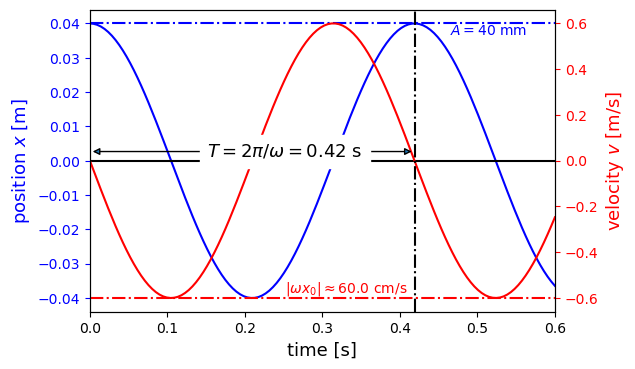

In [15]:
plot_SHO(k=180., m=0.8, x0=4e-2, v0=0.)  # default plot for pdf export

$T = 2\pi/\omega = 1/\nu$ is called the *period* of the oscillation, expressed in seconds.

*Suggested practise:*

* *What happens to $\omega$ if $m$ or $k$ increase? You can use the code above, but make sure  you convince yourself that it makes physical sense.*

* *What if $v(t=0) = v_0 \neq 0?$ Solve numerically with the values of King (worked example p. 9), and move the slider around to plot it.*

In [16]:
from ipywidgets import interact, FloatSlider

interact(plot_SHO, k=180, m=0.8,
         x0=FloatSlider(min=-0.1, max=0.1, step=1e-2, value=4e-2),
         v0=FloatSlider(min=-0.5, max=0.5, step=1e-2, value=0.))

interactive(children=(IntSlider(value=180, description='k', max=540, min=-180), FloatSlider(value=0.8, descrip…

<function __main__.plot_SHO(k, m, x0, v0)>

***

I will work out the second bullet point in detail here, but not in class.
The only difference with my previous example are the initial conditions.
We are still looking for a solution of the form $x = A\cos(\omega t + \phi)$.
The velocity is $v = -A\omega\sin(\omega t + \phi)$.

Plugging the initial conditions for $t=0$ yields $x_0 = A \cos\phi$ and
\begin{align*}
    v_0 & = -A\omega\sin\phi \\
        & = -A\omega\sqrt{1-\cos^2\phi} \\
        & = -A\omega\sqrt{1-x_0^2/A^2} = -\omega\sqrt{A^2-x_0^2}.
\end{align*}

If we square the last equation, we get
$$ v_0^2 - \omega^2(A^2 - x_0^2) = 0 \quad\Rightarrow\quad  A = \sqrt{x_0^2 + v_0^2/\omega^2}. $$
Note: technically, $A$ should be $\pm$ the result above.
Mathematically, we could choose $A<0$, which would add or remove $\pi$ to the phase.
However, an amplitude is always positive by definition.

Let us use the numerical values of King, p.9.:
$m = 0.8$ kg, $k = 180$ N.m$^{-1}$, therefore, $\omega = 15$ rad.s$^{-1}$. For the initial conditions, $x_0 = 4$ cm and $v_0 = 0.5$ m.s$^{-1}$, and therefore, $A \approx 5.21$ cm.

Based on these numerical values, $\cos\phi \approx 0.768$, meaning $\phi \approx \pm 39.8^\circ$, and $\sin\phi \approx -0.640$, meaning $\phi \approx -39.8^\circ$ or $220^\circ$.
Therefore, $\phi \approx -39.8^\circ$.

In [17]:
# A numpy-esque way of doing it
from numpy import arccos, arcsin, sqrt
k = 180.  # [N/m]
m = 0.8  # [kg]
x0 = 4e-2  # [m]
v0 = 0.5  # [m/s]
omega = sqrt(k/m)  # [rad/s] angular frequency
A = sqrt(x0**2 + v0**2/omega**2)  # [m] position amplitude
cos_of_phi = x0/A
print('phi = {0:.1f} or {1:.1f}'.format(180*arccos(cos_of_phi)/pi,
                                        -180*arccos(cos_of_phi)/pi))

phi = 39.8 or -39.8


In [18]:
sin_of_phi = -v0/(omega*A)
print('phi = {0:.1f} or {1:.1f}'.format(180*arcsin(sin_of_phi)/pi,
                                        180-180*arcsin(sin_of_phi)/pi))

phi = -39.8 or 219.8


In [19]:
# Above, the only value in common is phi = -39.8 degrees. It is the correct value.

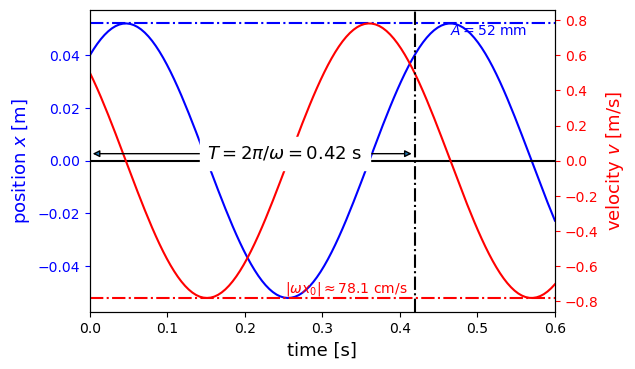

In [20]:
plot_SHO(k=180., m=0.8, x0=4e-2, v0=0.5)  # another plot for pdf export

The figure above shows that with some positive initial velocity, the mass keeps going in the positive direction for a little while.
The oscillation period remains the same however, and the curves above look fundamentally the same as the "clamped mass" situation, earlier, except for a shift in time.

# Energy Juggling

Before diving into the physics, remind yourself of what happens when we take the square of a sine or a cosine in the video below or at https://youtu.be/xnfTlPtIabg.

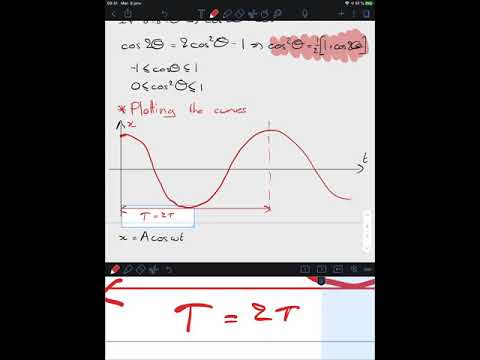

In [31]:
YouTubeVideo('xnfTlPtIabg', width=800, height=300)

Considering the energy is a powerful tool to solve many problems.
SHOs are no exception, because without dissipation, their total mechanical energy stays the same forever.

You certainly remember that the kinetic energy (KE) $K$ of an object of mass $m$ and velocity $v$ is $$K = \frac12 m v^2.$$
The only part of the system that has KE is the mass, because the spring is ideal (weightless).

But what is the equivalent of the potential energy (PE), which I will call $U$?
When an object of mass $m$ initially at rest is dropped in vacuum and travels a distance $h$, it KE is equal to $mgh$, the PE it had initially.
Following this analogy, we measure $U$ in our system from a state when the KE is zero, i.e., when the spring is in a  state of maximal extension or compression.
This time, it is the spring that contains $U$, not the mass.
The spring packs all the potential for the mass to gain KE.
This is where the analogy with the dropped ball fails: the PE that the ball had before being dropped was proportional to its mass because the force that was going to set it in motion was the gravitational force.
Here, it is the force of the spring, which does not care about the mass, or absence thereof, of the spring, only its extension.

So, back to our spring. The infinitesimal PE of an infinitesimally small piece of spring located at position $x'$ is related to the work $W = -\di U$ done when moving it by a distance $\di x'$, following
$$ W = \vec F(x') \cdot \di \vec x' = -kx'\di x'. $$

The potential energy stored in the *entire* spring whose length has increased by $x$ (the position of the mass) is therefore
$$ U = \int_0^x kx'\di x' = \frac12 kx^2. $$

It is easy to check that the total mechanical energy is constant:
$$\boxed{ E = K + U = \frac12 mv^2 + \frac12 kx^2 = \frac12 k A^2 =  constant.} $$
Indeed, recall that we already computed $x(t)$ and $v(t)$. 
It is simply a matter of substituting for them, and remembering that $\cos^2 + \sin^2 = 1$.

Note that when I introduced this chapter, I mentioned that considerations about energy conservation helped solve problems.
Here, I just did the opposite: I verified conservation of energy by solving the problem first.
King § 1.2.5 has a derivation that derives energy conservation from Newton's 2$^{nd}$ law, which you should definitely check out.

Back to the framed equation above: **the energy is proportional to the square of the amplitude**, which is a very general statement about oscillations. Remember it!

In [21]:
# Let us plot this.
def plot_SHO_E(k, m, x0, v0):
    """ Function that computes and plots the energy
    INPUT:
    k: spring stiffness [N/m, kg/(s**2)]
    m: mass [kg]
    x0: initial position [m]
    v0: initial velocity [m/s]
    OUTPUT: plot of the energies"""
    
    omega = sqrt(k/m)  # [rad/s] angular frequency
    T = 2*pi/omega  # [s] period
    A = sqrt(x0**2 + v0**2/omega**2)  # [m] position amplitude
    phi = angle((x0 - 1j*v0/omega)/A)  # phase
    
    t = linspace(0., 0.6, 128)  # time array, from 0 to 0.6 s, 128 points
    x = A*cos(omega*t + phi)  # position [m]
    v = -A*omega*sin(omega*t + phi)  # [m/s] velocity
    
    K = 0.5*m*v**2  # [J or kg*(m/s)**2] kinetic energy
    U = 0.5*k*x**2  # [J or kg*(m/s)**2] potential energy
    E = 0.5*k*A**2  # [J or kg*(m/s)**2] mechanical energy
    
    ftsz = 13  # font size
    plt.figure(dpi=100)

    ax1 = plt.gca()
    ax1.plot(t, K, 'b', label='$K$')  # plotting the KE K
    ax1.plot(t, U, 'r--', label='$U$')  # plotting the PE U
    ax1.legend()
    ax1.set_xlabel('time [s]', fontsize=ftsz) 
    ax1.set_ylabel(r'Energy [J, or kg.m$^2$.s$^{-2}$]', color='b', fontsize=ftsz)

    # annotation to highlight the total energy
    ax1.axhline(E, color='k', linestyle='-.')  # total mechanical energy
    ax1.text(T*1.11, E*0.97, '$E = kA^2/2$', color='k',
             verticalalignment='top', horizontalalignment='left',
             backgroundcolor='w', fontsize=ftsz)

    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line
    ax1.set_xlim([t.min(), t.max()])

    # annotation to highlight the period
    ax1.axvline(T, color='k', linestyle='-.')  # the t=T mark
    ax1.annotate(s='', xy=(0., 0.2*E), xytext=(T, 0.2*E),
                 arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax1.text(T/2, 0.2*E, r'$T = 2\pi/\omega \approx {0:.2f}$ s'.format(T),
             verticalalignment='center', horizontalalignment='center',
             backgroundcolor='w', fontsize=ftsz)
    
    plt.show()
    
    return

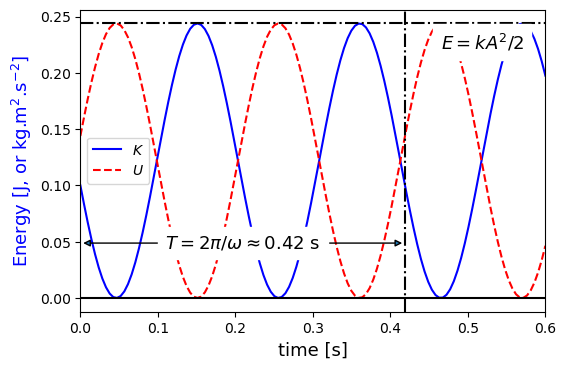

In [22]:
plot_SHO_E(k=180., m=0.8, x0=4e-2, v0=0.5)  # plot for pdf export

In [23]:
interact(plot_SHO_E, k=180, m=0.8,
         x0=FloatSlider(min=-0.1, max=0.1, step=1e-2, value=4e-2),
         v0=FloatSlider(min=-0.5, max=0.5, step=1e-2, value=0.))

interactive(children=(IntSlider(value=180, description='k', max=540, min=-180), FloatSlider(value=0.8, descrip…

<function __main__.plot_SHO_E(k, m, x0, v0)>

Which makes sense: at maximum extension, $K=0$ and $U = kx_0^2/2$ is maximum.
When the mass passes by the rest position $x=0$ at $t=T/4$, the velocity and therefore $K$ are at their  maxima, but the spring is neither stretched or compressed and $U=0$. 
Half a period later, the spring is at its maximum compression (if initially stretched), $U = kx_0^2/2$ again, and the velocity is zero ($K=0$ again).

Notice how I just described a **frequency doubling**: $K$ and $U$ get back to their original values after *half* a period.
The periodicity of $K$ and $U$ is twice that of $x$ and $v$, which one can tell mathematically because $\sin^2(\omega t) = [1 - \cos(2\omega t)]/2$ and $\cos^2(\omega t) = [1 + \cos(2\omega t)]/2$.
**Remember this!** (the fact that the frequency doubles, not the trigonometric identities)

# Electrical Analogy: LC Circuit

## Solutions

The derivation we just did can be applied to countless systems.
It could be about small oscillations of a pendulum (King § 1.3), a horizontal disk hanging from a tortional string, and many more.
They all obey a second-order ODE, and the different physics of each oscillator is contained in the angular frequency $\omega$.
We illustrate this point with an electric circuit consisting of a capacitor (capacitance $C$) and an inductor (inductance $L$) connected in series, with a switch in-between (cf. fig. 3).
As for the spring, where we ignored all frictional or dissipative processes, we ignore the resistance in the circuit for now.
But not to fear, young waver: it will take back its rightful place in the next chapter.

![Fig. 3](LC_circuit.png)

Initial conditions:

1. Switch is open, capacitor is charged to voltage $V_C$. The charge in the capacitor is $q = CV_C$.

2. Switch is open thus currrent $I=\dot{q} = 0$.

We then close the switch. Current starts flowing, $I = \dot q \neq 0$, and the voltage accross $L$ is $V_L = L \dot I$.
Therefore,
$$ \underbrace{V_L+V_C = 0}_{Kirchhof\!f's\ law} = L\dot I + \frac{q}C  = L\ddot q + \frac{q}C, $$
or, written in a now familiar form,
$$ \boxed{\ddot q + \omega^2 q = 0, \quad \textrm{with}\quad \omega^2 = 1/(LC).} $$

Based on the few equations above, there is a one-to-one correspondence between the mass+spring and the capacitor+inductor system.
The capacitor packs 'potential energy' (actually, electrostatic energy) and relases it as 'kinetic energy' (actually, magnetic energy), which the inductor uses to send electrons in the other direction and revert the sign of the voltage.
More specifically, the correspondance is:

| Mass+spring | LC circuit |
| :-: | :-: |
| $x$ | $q$ |
| $v$ | $I$ |
| $m$ | $L$ |
| $k$ | $1/C$ |
| KE $K = mv^2/2$ | Magnetic energy $LI^2/2$ |
| PE $U = kx^2/2$ | Electrostatic energy $CV_C^2/2$ |